# Stress Analysis in Social Media

Leverage the newly published and labelled reddit dataset for stress analysis to develop and improve supervised learning methods for identifying stress, both neural and traditional, and analyze the complexity and diversity of the data and characteristics of each category.

In [1]:
from scipy.sparse import hstack, csr_matrix
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.corpus import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

from wordcloud import WordCloud

## EDA

In [24]:
# path = '/content/Insight_Stress_Analysis/data/' 
path = '../data/'
train = pd.read_csv(path + 'dreaddit-train-processed.csv', encoding = "ISO-8859-1")
test = pd.read_csv(path + 'dreaddit-test-processed.csv', encoding = "ISO-8859-1")

In [3]:
domain = {'domesticviolence':'abuse',
          'survivorsofabuse':'abuse',
          'anxiety': 'anxiety',
          'stress': 'anxiety', 
          'almosthomeless': 'financial',
          'assistance': 'financial',
          'food_pantry': 'financial', 
          'homeless': 'financial',
          'ptsd': 'ptsd',
          'relationships': 'social'}

train['domain'] = train['subreddit'].map(domain)
test['domain'] = test['subreddit'].map(domain)

Number of train data 2838


C:\Users\sichi\PycharmProjects\NLPproiect\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='label', ylabel='count'>

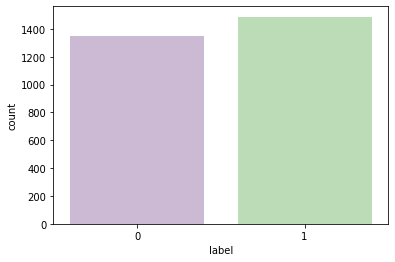

In [4]:
print('Number of train data', len(train))
sns.countplot('label', data = train, palette='PRGn')

C:\Users\sichi\PycharmProjects\NLPproiect\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Number of train data 715


<AxesSubplot:xlabel='label', ylabel='count'>

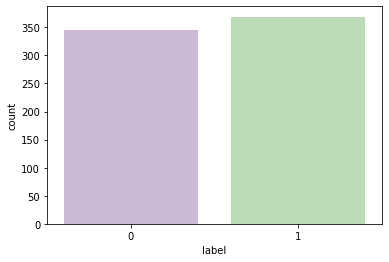

In [5]:
print('Number of train data', len(test))
sns.countplot('label', data = test, palette='PRGn')

When doing the presentation, can add a part of analyzing the text with lexicon-based tool such as textblob

C:\Users\sichi\PycharmProjects\NLPproiect\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\sichi\PycharmProjects\NLPproiect\venv\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\sichi\PycharmProjects\NLPproiect\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnin

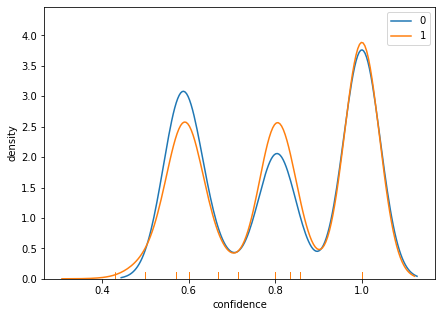

In [6]:
train[['label', 'confidence']]

fig, ax = plt.subplots(1, 1, figsize=(7, 5))

label_0 = train.loc[train['label'] == 0]
label_1 = train.loc[train['label'] == 1]

sns.distplot(label_0[['confidence']], hist=False, rug=True, ax=ax, label=0)
sns.distplot(label_1[['confidence']], hist=False, rug=True, ax=ax, label=1)

ax.legend() 
ax.set_xlabel('confidence')
ax.set_ylabel('density')
plt.show()

In [26]:
train['text'].iloc[0]

'He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI\'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f\'n worried about my heart. I do happen to have a physical in 48 hours.'

In [25]:
train['processed_text'].iloc[0]

'he say he have not feel that way before , suggete I go rest and so .. trigger ahead if youi\'re a hypocondriac like I : I decide to look up " feeling of doom " in hope of maybe get suck into some rabbit hole of ludicrous conspiracy , a stupid " be you psychic " test or new age b.s . , something I could even laugh at down the road . no , I end up read that this sense of doom can be indicative of various health ailment ; one of which I be prone to .. so on top of my " doom " to my gloom .. I be now f\'n worried about my heart . I do happen to have a physical in   hour .'

## Feature Extraction
- vectorization
- bag-of-n-grams
- tf-idf
- word2vec
- word embedding (pretrained
- fasttext 
- glove 

### TF-IDF
Find TF-IDF of unigram, bigram and trigram

#### Unigram

In [27]:
train_corpus = train['processed_text']
test_corpus = test['processed_text']

In [28]:
X = train_corpus.append(test_corpus)
X = X.reset_index(drop=True)

In [29]:
print(X)

0       he say he have not feel that way before , sugg...
1       hey there r / assistance , not sure if this be...
2       my mom then hit I with the newspaper and it sh...
3       until I meet my new boyfriend , he be amazing ...
4       october be domestic violence awareness month a...
                              ...                        
3548    I have horrible vivid nightmare every night . ...
3549    also I can not think about both of they withou...
3550    furthermore , I tell he before we get really s...
3551    here be the link to my amazon wish list where ...
3552    how can I keep we protect ? they have already ...
Name: processed_text, Length: 3553, dtype: object


In [30]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,1)) #unigram, bigram, trigram
X_new = vectorizer.fit_transform(X)

X_train = X_new.toarray()[:len(train)]
X_test = X_new.toarray()[len(train):]

In [31]:
print(X_train.shape)
print(X_test.shape)

(2838, 9106)
(715, 9106)


In [32]:
def top_tfidf_features(row, features, top_n):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_features = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_features)
    df.columns = ['feature', 'tfidf']
    return df

def top_features_in_post(data, features, row_id, top_n):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(data[row_id])
    return top_tfidf_features(row, features, top_n)

In [33]:
features = vectorizer.get_feature_names()
top_features_in_post(X_train, features, 0, 10)

C:\Users\sichi\PycharmProjects\NLPproiect\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,feature,tfidf
0,doom,0.512793
1,youi,0.196363
2,conspiracy,0.196363
3,ludicrous,0.196363
4,suggete,0.196363
5,hypocondriac,0.196363
6,gloom,0.196363
7,indicative,0.196363
8,ailment,0.186977
9,psychic,0.180317


In [34]:
def top_mean_features_by_label(X, y, features, top_n, label_id):
    ids = np.where(y == label_id)
    
    if ids:
        new_data = X[ids]
    else:
        new_data = X


    tfidf_means = np.mean(new_data, axis=0)
    feature_df = top_tfidf_features(tfidf_means, features, top_n)
    feature_df['label'] = label_id

    return feature_df    

In [35]:
non_stress_df = top_mean_features_by_label(X_train, train['label'], features, 200, 0)
stress_df = top_mean_features_by_label(X_train, train['label'], features, 200, 1)

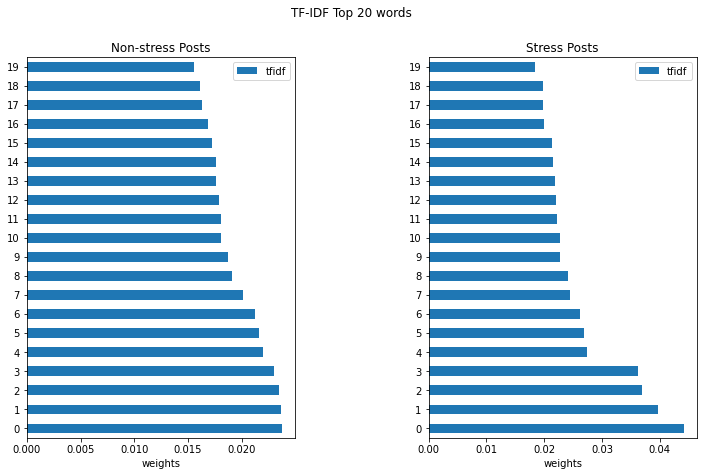

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(12, 7))
non_stress_df[['feature', 'tfidf']][:20].plot(kind='barh', ax=ax[0])
stress_df[['feature', 'tfidf']][:20].plot(kind='barh', ax=ax[1])

ax[0].set_title('Non-stress Posts')
ax[0].set_xlabel('weights')

ax[1].set_title('Stress Posts')
ax[1].set_xlabel('weights')


fig.suptitle('TF-IDF Top 20 words')
plt.subplots_adjust(wspace = 0.5)
plt.show()

In [37]:
def create_tfidf_word_cloud(weights):
    wc = WordCloud(width=800, height=500, random_state=21, max_font_size=110)
    wordcloud = wc.generate_from_frequencies(weights)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

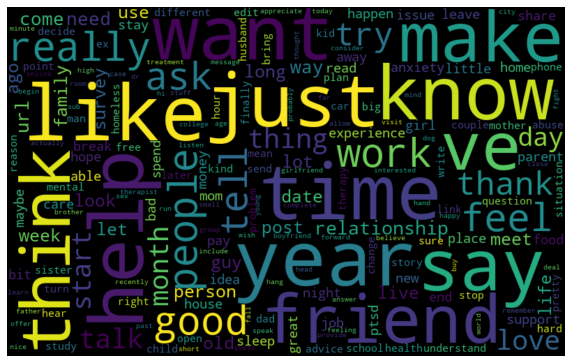

In [38]:
non_stress_weights = dict(zip(non_stress_df.feature, non_stress_df.tfidf))
create_tfidf_word_cloud(non_stress_weights)

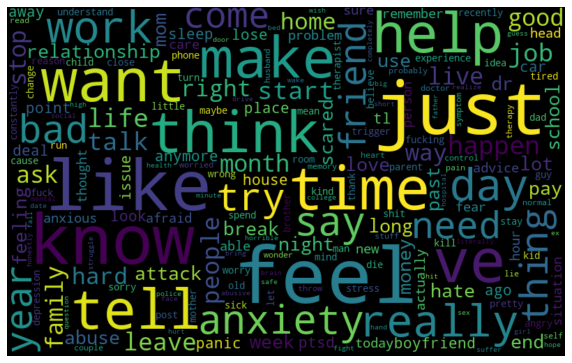

In [39]:
stress_weights = dict(zip(stress_df.feature, stress_df.tfidf))
create_tfidf_word_cloud(stress_weights)

#### 1~3-gram

In [40]:
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,3)) #unigram, bigram, trigram
X_new = vectorizer.fit_transform(X)
X_train = X_new.toarray()[:len(train)]
X_test = X_new.toarray()[len(train):]

features = vectorizer.get_feature_names()

non_stress_df = top_mean_features_by_label(X_train, train['label'], features, 200, 0)
stress_df = top_mean_features_by_label(X_train, train['label'], features, 200, 1)

C:\Users\sichi\PycharmProjects\NLPproiect\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


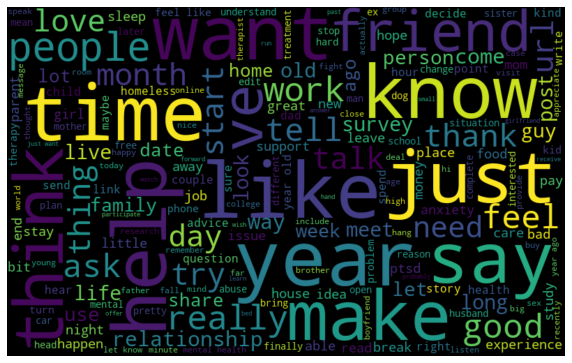

In [41]:
non_stress_weights = dict(zip(non_stress_df.feature, non_stress_df.tfidf))
create_tfidf_word_cloud(non_stress_weights)

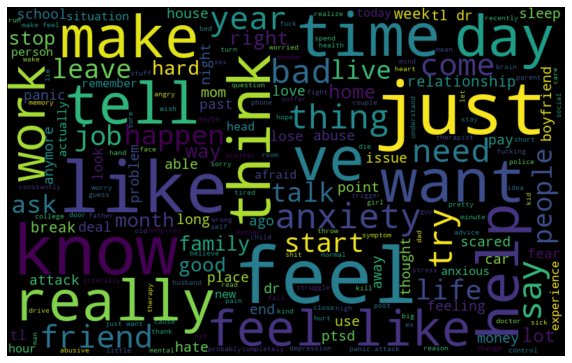

In [42]:
stress_weights = dict(zip(stress_df.feature, stress_df.tfidf))
create_tfidf_word_cloud(stress_weights)

## Classification
### TF-IDF with NLP Classifiers (1-gram)

In [43]:
y_train = train['label']
y_test = test['label']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [44]:
clf_dict = {'log reg': LogisticRegression(random_state=42), 
            'naive bayes': GaussianNB(), 
            'linear svc': LinearSVC(random_state=42),
            'CART': DecisionTreeClassifier(random_state=42),
            'random forest': RandomForestClassifier(n_estimators=100, random_state=42)}

In [45]:
for name, clf in clf_dict.items():
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy of {}:'.format(name), accuracy_score(y_pred, y_test))

Accuracy of log reg: 0.7132867132867133
Accuracy of naive bayes: 0.6
Accuracy of linear svc: 0.7356643356643356
Accuracy of CART: 0.5664335664335665
Accuracy of random forest: 0.6965034965034965


In [46]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7132867132867133

#### Classification Result
Visualize the results 
- Confusion Matrix (precision, recall...)
- TSNE
- Word Cloud (different domains' important words)

<AxesSubplot:>

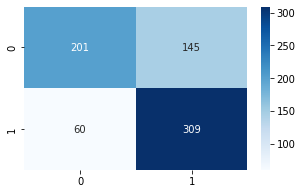

In [47]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = [i for i in "01"], columns = [i for i in "01"])
plt.figure(figsize = (5, 3))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

In [48]:
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('F1-Score', f1_score(y_test, y_pred))

Precision 0.6806167400881057
Recall 0.8373983739837398
F1-Score 0.7509113001215068


### TF-IDF with NLP Classifiers (1/2/3-gram)

In [49]:
# %%
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

for name, clf in clf_dict.items():
    model = clf.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy of {}:'.format(name), accuracy_score(y_pred, y_test))

Accuracy of log reg: 0.7132867132867133
Accuracy of naive bayes: 0.6
Accuracy of linear svc: 0.7356643356643356
Accuracy of CART: 0.5664335664335665
Accuracy of random forest: 0.6965034965034965


In [50]:
clf = LinearSVC(random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7356643356643356

<AxesSubplot:>

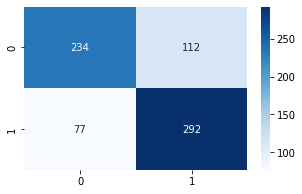

In [51]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = [i for i in "01"], columns = [i for i in "01"])
plt.figure(figsize = (5, 3))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

In [52]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.7132867132867133

<AxesSubplot:>

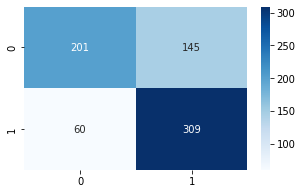

In [53]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = [i for i in "01"], columns = [i for i in "01"])
plt.figure(figsize = (5, 3))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

In [54]:
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('F1-Score', f1_score(y_test, y_pred))

Precision 0.6806167400881057
Recall 0.8373983739837398
F1-Score 0.7509113001215068


### TF-IDF with NLP Classifiers (1/2/3-gram) + features

In [55]:
features_train = train.drop(['subreddit','post_id','sentence_range','text','id','label','confidence','social_timestamp','social_karma','syntax_ari','processed_text'], 1)
features_test = test.drop(['subreddit','post_id','sentence_range','text','id','label','confidence','social_timestamp','social_karma','syntax_ari','processed_text'], 1)

print(features_train.columns)
features_len = len(features_train.columns)


Index(['Unnamed: 0', 'lex_liwc_WC', 'lex_liwc_Analytic', 'lex_liwc_Clout',
       'lex_liwc_Authentic', 'lex_liwc_Tone', 'lex_liwc_WPS',
       'lex_liwc_Sixltr', 'lex_liwc_Dic', 'lex_liwc_function',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=107)


C:\Users\sichi\PycharmProjects\NLPproiect\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
C:\Users\sichi\PycharmProjects\NLPproiect\venv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [58]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(1,3),
    dtype=np.float32,
    max_features=5000
)

all_data = pd.concat([train,test])

word_vectorizer.fit(all_data["processed_text"])
train_word_features = word_vectorizer.transform(train["processed_text"])
test_word_features = word_vectorizer.transform(test["processed_text"])

In [60]:
full_train = hstack([train_word_features,features_train])
full_test = hstack([test_word_features,features_test])

X_train = full_train
y_train = train["label"]

X_test = full_test
y_test = test["label"]

In [61]:
clf = LogisticRegression(C=100,random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

C:\Users\sichi\PycharmProjects\NLPproiect\venv\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.7482517482517482

<AxesSubplot:>

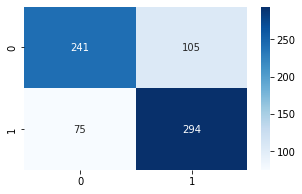

In [62]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index = [i for i in "01"], columns = [i for i in "01"])
plt.figure(figsize = (5, 3))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')

In [63]:
print('Precision', precision_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('F1-Score', f1_score(y_test, y_pred))

Precision 0.7368421052631579
Recall 0.7967479674796748
F1-Score 0.765625
